In [1]:
import sys
import os

# Get the absolute path to the scripts directory
module_path = os.path.abspath(os.path.join('scripts'))  # Relative to the notebook's location

# Add it to the system path if it's not already there
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from vae import VAE, Sampling
import init_gpu
init_gpu.initialize_gpus()

Num GPUs Available:  0


In [55]:
import tensorflow as tf
import model_utils


SAVE_PATH = '../models/di_vae/'
epochs = 500
vae_model = tf.keras.models.load_model(
        f"{SAVE_PATH}/vae-e{epochs}.keras", compile=False, custom_objects={'Sampling': Sampling, 'VAE': VAE})
domain_discriminator = tf.keras.models.load_model(
        f"{SAVE_PATH}/domain_discriminator-e{epochs}.keras", compile=False)

c:\Users\kaush\pyenv\ml_env\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
from load_data import DataLoader

data_loader = DataLoader("../dataset")
dataset =  data_loader.get_training_data()
horse_dataset = dataset['horse']
zebra_dataset = dataset['zebra']

Found 1067 files.
Found 1334 files.


In [17]:
# load a batch from zebra dataset
zebra_batch = zebra_dataset.take(1)
zebra_batch = next(iter(zebra_batch))

horse_batch = horse_dataset.take(1)
horse_batch = next(iter(horse_batch))

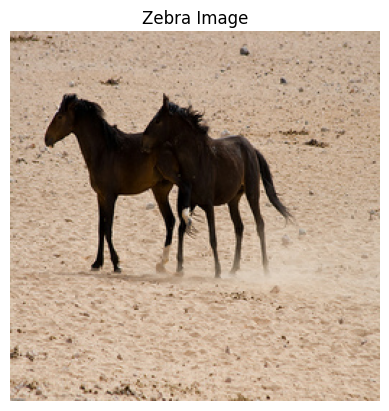

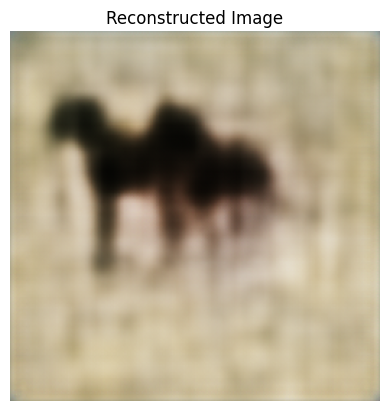

In [52]:
import numpy as np

x_batch, y_batch = horse_batch
index = np.random.randint(0, len(x_batch), 1)[0]

import matplotlib.pyplot as plt
plt.figure()
plt.axis('off')
plt.title("Zebra Image")
plt.imshow(x_batch[index])


# reconstruct the image using the VAE model
reconstructed, _, _ = vae_model(x_batch[index:index+1])
plt.figure()
plt.axis('off')
plt.title("Reconstructed Image")
plt.imshow(reconstructed.numpy().reshape(256, 256, 3))
plt.show()

# Hyperplane

In [60]:
from hyperplane import Hyperplane

domain_hyperplane = Hyperplane(domain_discriminator)
w, b = domain_hyperplane.get_hyplerplane_params()
w.shape, b

(TensorShape([128]),
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.03764845430850983>)

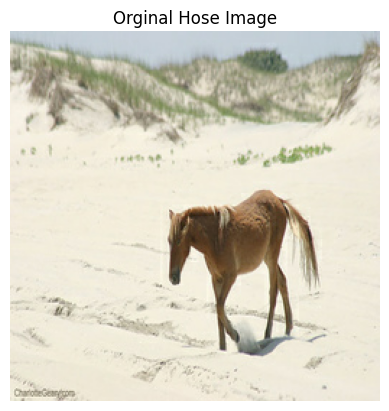

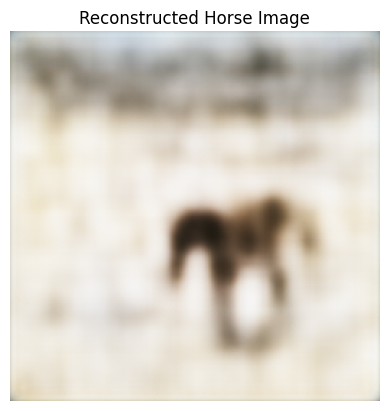

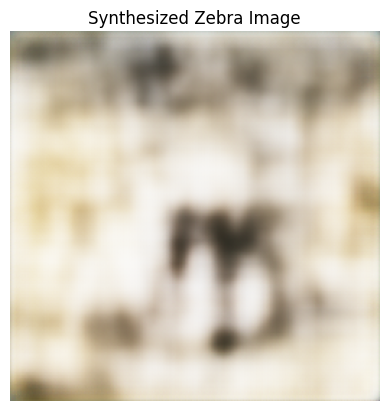

In [79]:
import numpy as np

x_batch, y_batch = horse_batch
index = np.random.randint(0, len(x_batch), 1)[0]

import matplotlib.pyplot as plt
plt.figure()
plt.axis('off')
plt.title("Orginal Hose Image")
plt.imshow(x_batch[index])

# reconstruct the image using the VAE model
reconstructed, _, _ = vae_model(x_batch[index:index+1])
plt.figure()
plt.axis('off')
plt.title("Reconstructed Horse Image")
plt.imshow(reconstructed.numpy().reshape(256, 256, 3))
plt.show()

# get the latent representation of the horse image
_, _, z_horse = vae_model.encode(x_batch[index:index+1])
z_zebra = domain_hyperplane.get_mirror_image(z_horse[0])

# reconstruct the image using the VAE model
reconstructed = vae_model.decode(z_zebra.numpy().reshape(1, -1))
plt.figure()
plt.axis('off')
plt.title("Synthesized Zebra Image")
plt.imshow(reconstructed.numpy().reshape(256, 256, 3))
plt.show()
